# Sitzung 11

Diese Skripte sind ausschließlich als Zusatz-Material gedacht. Speziell für diejenigen unter Euch, die einen Einblick in das Programmieren gewinnen wollen. Wenn Du es also leid bist repetitive Tätigkeiten auszuführen und das lieber einer Maschine überlassen willst, bist Du hier genau richtig. 

<span style="color:red"> Die Codes sind nicht für die Klausur relevant, genau genommen haben sie mit dem Lehrstuhl für Statistik **rein gar nichts** zu tun. </span>
***

In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
np.random.seed(42)

## Simulierte Grundgesamtheit

$$X \sim N(10; 20)$$

In [2]:
truth = np.random.normal(loc=10, scale=20, size=10000)
print(truth)

[19.93428306  7.23471398 22.95377076 ... -4.10633448 19.91531146
 22.88776907]


In [3]:
mu = truth.mean()
print("Echter Mittelwert: {}".format(mu))

Echter Mittelwert: 9.957280332631475


In [4]:
sigma = truth.std()
print("Echte Standardabweichung: {}".format(sigma))

Echte Standardabweichung: 20.06824412259975


## Stichproben

1. Umfang von $n = 10$

In [5]:

def plot_dist(loc, scale, ax, **kwargs):
    x = np.linspace(loc-3*scale, loc+3*scale, num=50)
    pdf = stats.norm.pdf(x, loc=loc, scale=scale)
    ax.plot(x, pdf, "-", **kwargs)


def get_ci(x, alpha):
    n = len(x)
    loc = x.mean()
    scale = x.std(ddof=1) / np.sqrt(n)
    c = stats.norm.ppf(1-alpha/2, loc=0, scale=1)
    x_lower = loc - c*scale
    x_upper = loc + c*scale
    return x_lower, x_upper


In [6]:
def compare_dist(nrow=1, ncol=1, **kwargs):
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, **kwargs)
    axes = np.array(axes)

    for ax in axes.flatten():
        desc = r"$\bar{X} \sim N(\mu,\frac{\sigma}{\sqrt{10}})$"

        # plot true distribution
        plot_dist(mu, sigma / np.sqrt(10), ax, c="r",
                  label=desc)

        # plot sample distributions
        sample = np.random.choice(truth, size=10)
        x_bar = sample.mean()
        std = sample.std(ddof=1) / np.sqrt(10)

        desc = r"$S \sim N({:3.3}; {:3.3})$".format(x_bar, std)
        plot_dist(x_bar, std, ax, c="grey", alpha=0.5,
                  label=desc)
        ax.legend()

    fig.suptitle("Grundgesamtheit vs Stichprobenmittelwert")
    return fig, ax


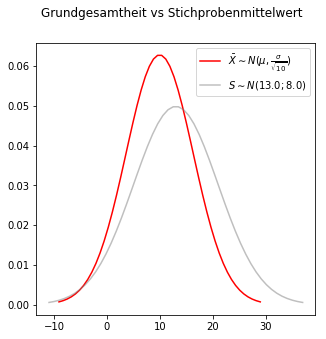

In [7]:
fig, ax = compare_dist(figsize=(5, 5))

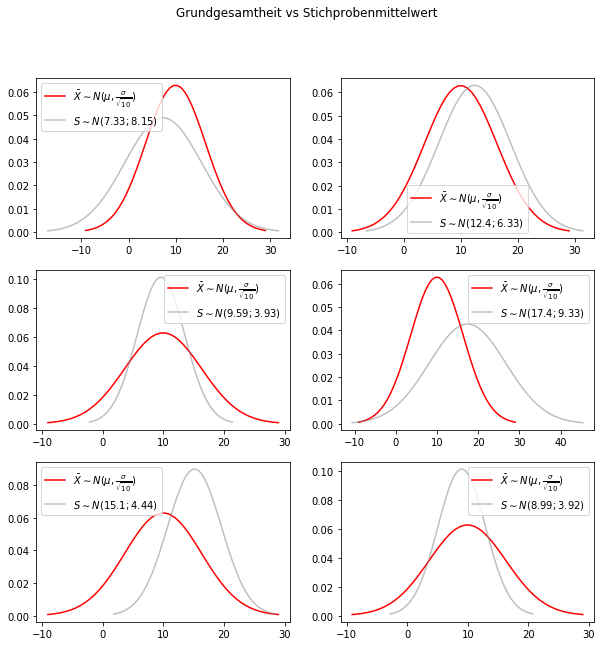

In [8]:
fig, ax = compare_dist(3, 2, figsize=(10, 10))

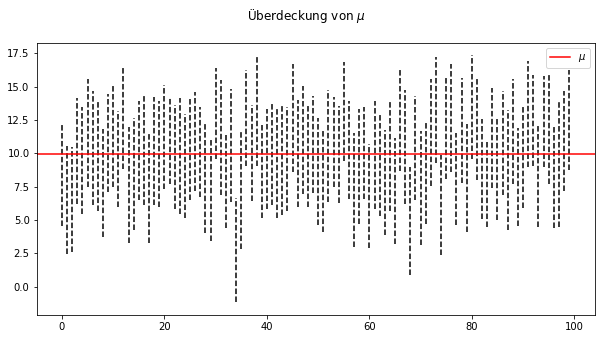

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(mu, c="r", label=r"$\mu$")
coverage = []

for i in range(100):
    x = np.random.choice(truth, size=100)
    x_lower, x_upper = get_ci(x, 0.05)
    ax.vlines(i, ymin=x_lower, ymax=x_upper, linestyle="--")
    mu_in_ci = (x_lower <= mu) and (mu <= x_upper)
    coverage.append(mu_in_ci)

plt.legend()
plt.suptitle(r"Überdeckung von $\mu$");

In [10]:
sum(coverage)/len(coverage)

0.97